In [74]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Explainability
import shap

# Display plots inline
%matplotlib inline

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


Below is one method of reading txt files stored in the PC.
we can use the ps.read_csv command. It requires the path of the file, names of the columns and the separator or delimiter, 
in this case it is a comma
The file path should use either one or two backslashes. When using one backslash, an 'r' should be placed beg=fore the path as shown below. 

df = pd.read_csv(r"C:\Users\maloo\OneDrive\Desktop\Machine learning Projects\diabetes_dataset.txt", names=cols,sep=',')
Alternatively, without specifying 'r' before filepath
df = pd.read_csv("C:\\Users\\maloo\\OneDrive\\Desktop\\Machine learning Projects\\diabetes_dataset.txt", names=cols,sep=',')
If you don't specify a column header, the first row becomes the header.

🔹 Step-by-Step Explanation
1. Data Handling
import pandas as pd
import numpy as np


pandas → library for tables/dataframes. You’ll use it to load the dataset, explore it, and manipulate columns/rows.

numpy → library for numerical computations. Helps with arrays, math operations, and is used internally by most ML libraries.

Example:

arr = np.array([1,2,3])
df = pd.DataFrame(arr, columns=["Numbers"])

2. Visualization
import matplotlib.pyplot as plt
import seaborn as sns


matplotlib.pyplot → basic plotting library (line plots, scatter plots, histograms).

seaborn → built on top of matplotlib; makes beautiful, easier statistical plots (like heatmaps, correlation plots).

Example:

sns.histplot(df["Numbers"])
plt.show()

3. Machine Learning
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix


Breakdown:

train_test_split → splits your data into training and testing sets.

Training → used to train the model.

Testing → used to evaluate how well the model performs on new data.

StandardScaler → scales numeric features to have mean=0 and std=1. Important for some models (like Logistic Regression).

LogisticRegression → simple classifier for binary outcomes (diabetes yes/no).

RandomForestClassifier → ensemble of decision trees; good for tabular data and robust to overfitting.

XGBClassifier → gradient boosting model, often gives state-of-the-art performance for tabular datasets.

classification_report, confusion_matrix → tools to evaluate model performance: precision, recall, F1-score, and visualizing predictions vs actual.

4. Explainability
import shap


shap → library for model interpretability.

Helps you understand which features contributed most to a prediction.

Very important in biomedical applications (doctors want to know why a model made a decision).

5. Inline Plots
%matplotlib inline


This is a Jupyter “magic command”.

Ensures that any plot you generate with matplotlib or seaborn shows directly inside the notebook, not in a separate window.

6. Confirmation
print("✅ Libraries imported successfully")


Simple confirmation that the cell ran without errors.

Helps you quickly know that your environment and imports are working.

✅ Summary of Cell 1

Purpose: Load all the libraries and setup needed for the project.

Effect: You can now:

Handle and clean data (pandas, numpy)

Visualize data (matplotlib, seaborn)

Train ML models (scikit-learn, xgboost)

Evaluate and interpret predictions (classification_report, shap)







In [75]:
# Column names
cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness",
        "Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

# Load dataset
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
df = pd.read_csv("C:\\Users\\maloo\\OneDrive\\Desktop\\Machine learning Projects\\diabetes_dataset.txt", names=cols,sep=',')
#df = pd.read_csv(url, names=cols)

# Preview data
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Outcome
0      500
1      267
100      1
Name: count, dtype: int64


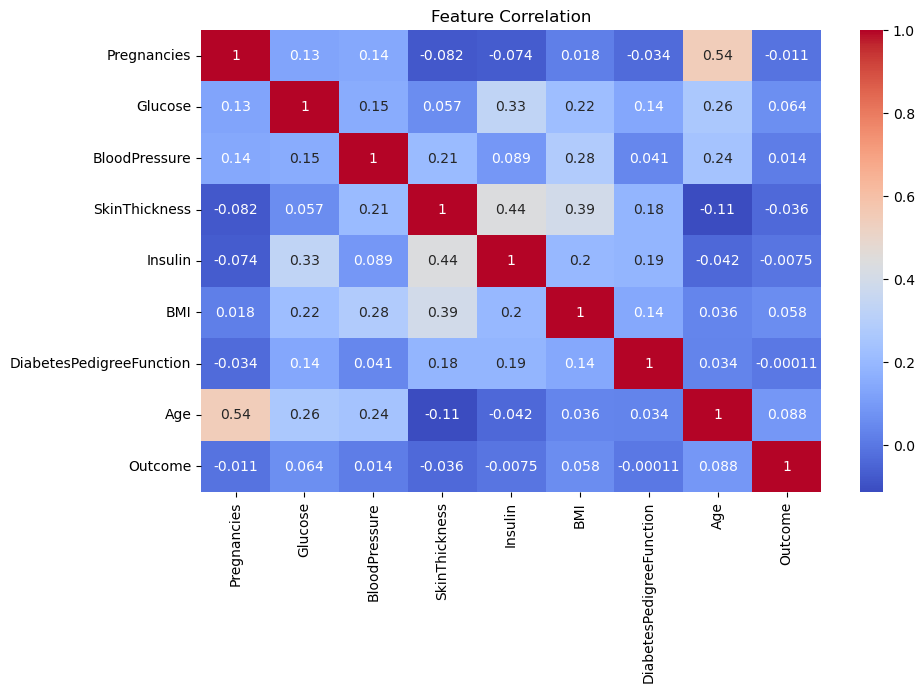

In [76]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
df.describe()

# Outcome class distribution
print(df["Outcome"].value_counts())

# Visualize correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [77]:
# Replace zeroes in some columns with NaN
to_fix = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[to_fix] = df[to_fix].replace(0, pd.NA)

# Fill missing values with median
df = df.fillna(df.median())

# Verify no missing values remain
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\maloo\AppData\Local\Temp\ipykernel_2672\17069725.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(df.median())


In [78]:
df[["Outcome"]]
df[["Outcome"]] = df[["Outcome"]].replace(100, 1)

In [79]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train/Test split done")


✅ Train/Test split done


In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Feature scaling done")


✅ Feature scaling done


In [81]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "Linear Discriminat Analysis": LinearDiscriminantAnalysis(n_components=1),
    "knn": KNeighborsClassifier(n_neighbors=5)
}
#lda = LinearDiscriminantAnalysis(n_components=2)
#X_train = lda.fit_transform(X_train, y_train)
#X_test = lda.transform(X_test)
neighbors=list(range(1,101))
score_array=[]
for n in neighbors:
    model=KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    score= model.score(X_test, y_test)
    score_array.append(score)
print(f"Accuracy: {max(score_array):.3f}")
    
    
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.3f}")


Accuracy: 0.766
Logistic Regression Accuracy: 0.708
Random Forest Accuracy: 0.779
XGBoost Accuracy: 0.760
Linear Discriminat Analysis Accuracy: 0.701
knn Accuracy: 0.753


C:\Users\maloo\anaconda3\envs\diabetes_ml\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:12:48] WARNING: D:\bld\xgboost-split_1755048450370\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



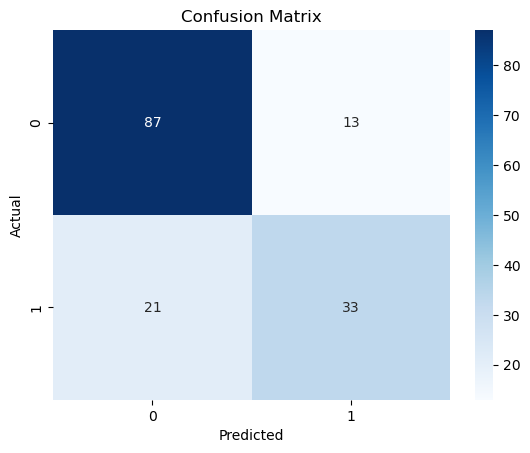

In [86]:
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
#best_model = KNeighborsClassifier(n_neighbors=5)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Classification metrics
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


X_test shape: (154, 8)
SHAP values shape: (154, 8, 2)


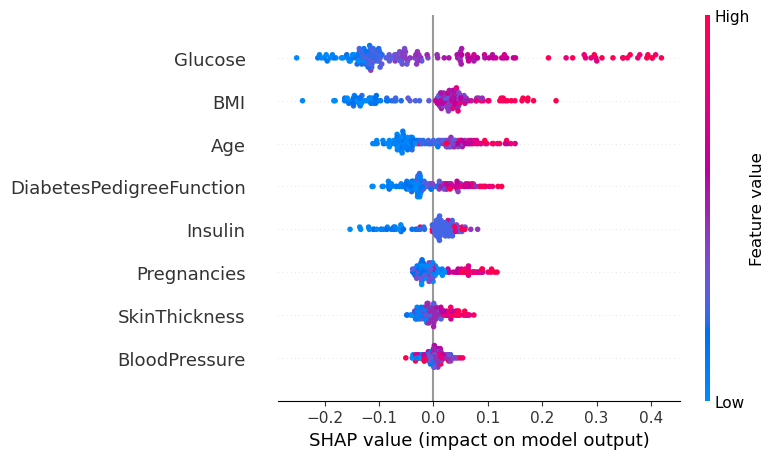

In [87]:
explainer = shap.TreeExplainer(best_model)
#explainer = shap.KernelExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
#shap.summary_plot(shap_values[1], X_test, feature_names=df.columns[:-1])

#explainer = shap.TreeExplainer(best_model) #this did not work
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

print("X_test shape:", X_test.shape)
print("SHAP values shape:", shap_values.shape)

# Plot SHAP values for the positive class (usually class 1 = "diabetes")
#shap.summary_plot(shap_values[1], X_test, feature_names=df.columns)
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=df.columns)



In [84]:
shap_values[:,:,1]

array([[ 0.06214717,  0.3003087 ,  0.00082839, ..., -0.1017704 ,
        -0.03168072,  0.0693965 ],
       [ 0.05835259, -0.14865867,  0.04948599, ...,  0.017001  ,
        -0.02932631,  0.06638826],
       [-0.03391481, -0.11525607, -0.00302176, ...,  0.02078461,
        -0.0294579 , -0.10756695],
       ...,
       [-0.03412659, -0.12863101, -0.03761238, ..., -0.04308277,
         0.09194406, -0.06215402],
       [-0.022261  ,  0.4027874 ,  0.00423786, ...,  0.02884853,
        -0.02344068,  0.03884005],
       [-0.01699232, -0.15286935, -0.00748297, ...,  0.0175317 ,
        -0.0245981 , -0.04180897]], shape=(154, 8))

In [88]:
import joblib

joblib.dump(best_model, "diabetes_model.pkl")

['diabetes_model.pkl']